In [1]:
p=genpath(pwd);
path(p,path);

# Hypothetical Visual Neuron

Now generate a hypothetical visual neuron and identify the values of lambda and beta for this neuron

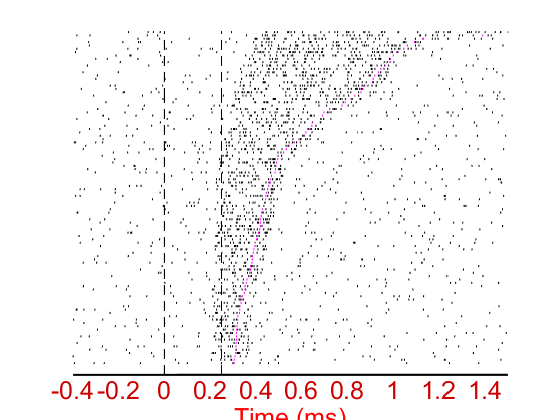

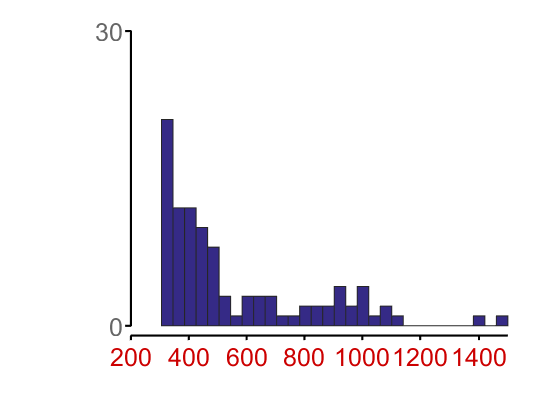

In [2]:
nTrials = 100;
t = [-0.4:0.01:1.5]';
zeroTime = 0.0;
RT = 0.305+gamrnd(0.7,0.4,1,nTrials);
RT(RT > 1.5) = 1.5;
figure(1);
hist(RT*1000,30);
hold on;
getAxesP([200 1500],[200:200:1500],'RT (ms)',-1,0.2,[0 30],[0 30],'Trials',200,1,[1 1]);
set(gca,'visible','off')


figure;
NeuronalLatency = 0.25;
simulatedBeta = 1;
simulatedBeta = 0.2;
simulatedLambda = NeuronalLatency./mean(RT);

[RT,i] = sort(RT);

figure(2);
spksRT = [];
spksRamp = [];
FR = [];
for k = 1:nTrials
    FR = 5*ones(1,length(t));
    % NeuronalLatency = NeuronalLatency + 1*[RT(k)-nanmean(RT)];
    FR(t > zeroTime + NeuronalLatency + simulatedBeta*(RT(k)-mean(RT)) & t < zeroTime + RT(k)+0.05) = 40;
    spksRT(k).times = generateInhomPoisson(t(1:length(t)), FR );
    X = spksRT(k).times';
    line([X; X],[k+0.2*ones(1,length(spksRT(k).times)); k+0.8*ones(1,length(spksRT(k).times))],'color','k');
    
    hold on;
    line([RT(k); RT(k)],[k+0.2; k+0.8],'color','m');
end
axis tight;
getAxesP([t(1) t(end)+zeroTime]-zeroTime,[t(1):0.2:t(end)+zeroTime]-zeroTime,8,-2,'Time (ms)',[t(1) t(end)],[t(1):0.2:t(end)],-1,-10,'Time (ms)',[1 0]);
% drawLines(0);
set(gca,'visible','off');

drawLines(NeuronalLatency);
drawLines(0);
data = [];

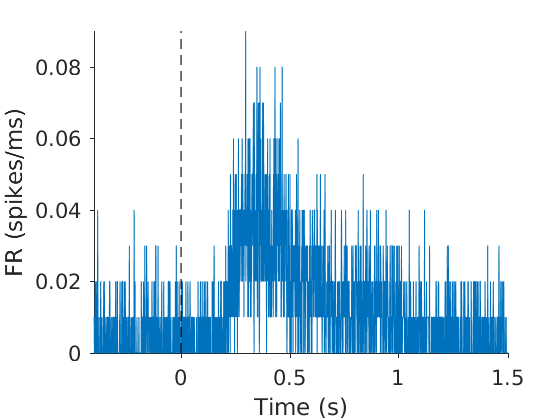

In [3]:
lims = [min(t) max(t)]*1000;
[dN,tBinned] = binspikes(spksRT,1000,[lims]./1000);
RT = RT*1000;
figure;
plot(tBinned, nanmean(dN,2));
hold on;
axis tight;
ylim([0 max(mean(dN,2))]);
drawLines(0);
xlabel('Time (s)')
ylabel('FR (spikes/ms)')
box off;
set(gca,'tickdir','out')


## Now compute $\lambda$ and $\beta$ for the hypothetical visual neuron

Before doing that make sure that the RT is in units of milliseconds

In [4]:
RT(1)

ans =

  305.6522

In [5]:
[lambda, beta] = estimateDiCarloAndMaunsell(dN, RT, tBinned);

1..-0.22, ..-0.02, ..0.18, ..0.38, ..0.58, ..0.78, ..0.98, 
 2..0.42, ..0.45, ..0.47, ..0.50,

In [6]:
fprintf('\n simulatedLambda: %3.3f, simulatedBeta: %3.3f', simulatedLambda, simulatedBeta);
fprintf('\n lambda: %3.3f, beta: %3.3f', lambda(2), beta(2))


simulatedLambda: 0.449, simulatedBeta: 0.200
 lambda: 0.455, beta: 0.203